# Table of Contents :
* [1. Introduction](#section1)
* [2. Importing Libraries](#section2)
* [3. Loading Datasets](#section3)
* [4. Data Analysis](#section4)
* [5. Data Visualization](#section5)
* [6. Data Preprocessing](#section6)
* [7. Machine Learning](#section6)

<a id="section1"></a>
# Introduction

## Kaggle Dataset Link

https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering

## About Dataset

This dataset is adapted from the Wine Data Set from https://archive.ics.uci.edu/ml/datasets/wine by removing the information about the types of wine for unsupervised learning.

The following descriptions are adapted from the UCI webpage:

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

The attributes are:

- Alcohol
- Malic acid
- Ash
- Alcalinity of ash
- Magnesium
- Total phenols
- Flavanoids
- Nonflavanoid phenols
- Proanthocyanins
- Color intensity
- Hue
- OD280/OD315 of diluted wines
- Proline

<a id="section2"></a>
# Importing Libraries

In [1]:
# Python version used
from platform import python_version
print('Python Version Used in this Jupyter Notebook:', python_version())

Python Version Used in this Jupyter Notebook: 3.9.7


In [265]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
pd.options.display.float_format = "{:.5f}".format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift, estimate_bandwidth
from itertools import cycle

In [4]:
# Libraries versions used in this jupyter notebook
%reload_ext watermark
%watermark -a "Victor Diallen Andrade do Amaral" --iversions

Author: Victor Diallen Andrade do Amaral

matplotlib: 3.8.0
pandas    : 2.1.1
numpy     : 1.23.0
seaborn   : 0.13.0



<a id="section3"></a>
# Loading Datasets

In [5]:
df = pd.read_csv('wine-clustering.csv')

In [7]:
df.head(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<a id="section4"></a>
# Data Analysis

In [6]:
# Shape of dataframe
df.shape

(178, 13)

In [7]:
# Checking for missing values
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [9]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<a id="section5"></a>
# Data Visualization

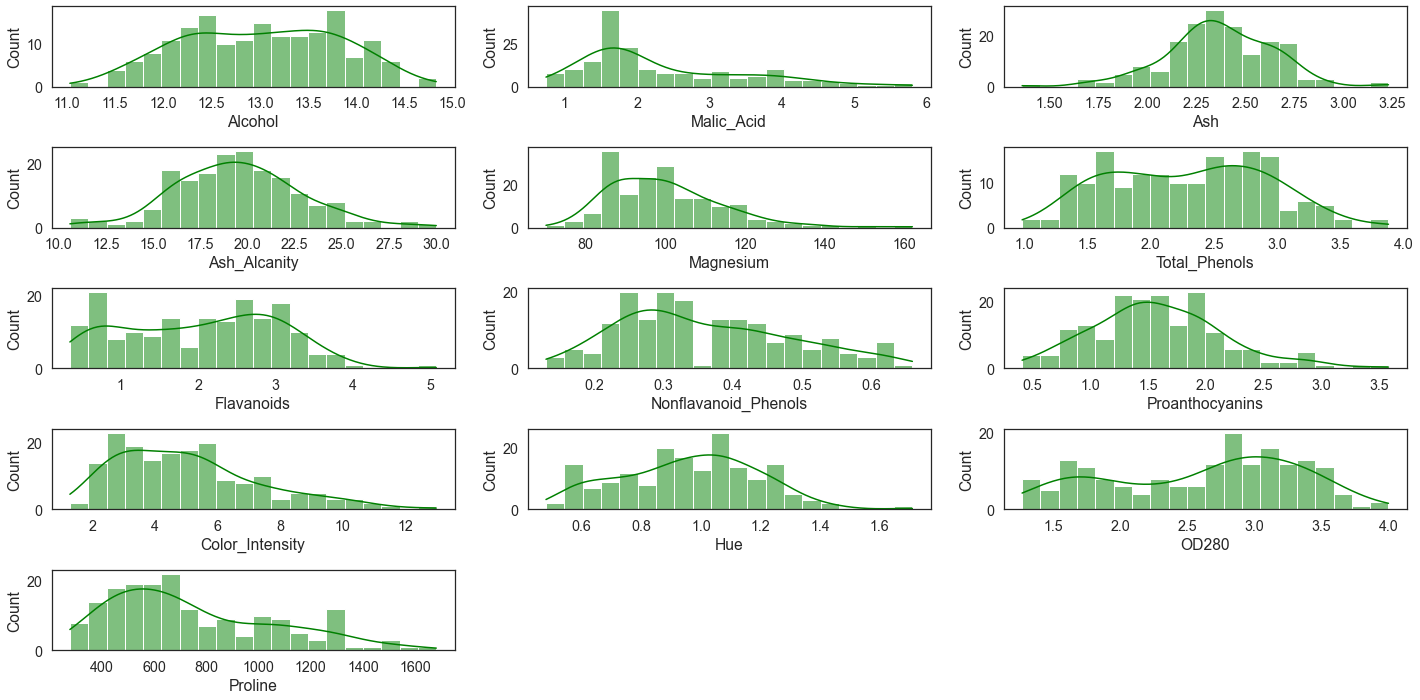

In [54]:
features = df.columns.to_list()
plt.figure(figsize = (20, 10))
for i in range(0, len(features)):
    plt.subplot(5, 3, i+1)
    sns.histplot(x = df[features[i]], kde = True, color = 'green', bins=20)
    plt.tight_layout()

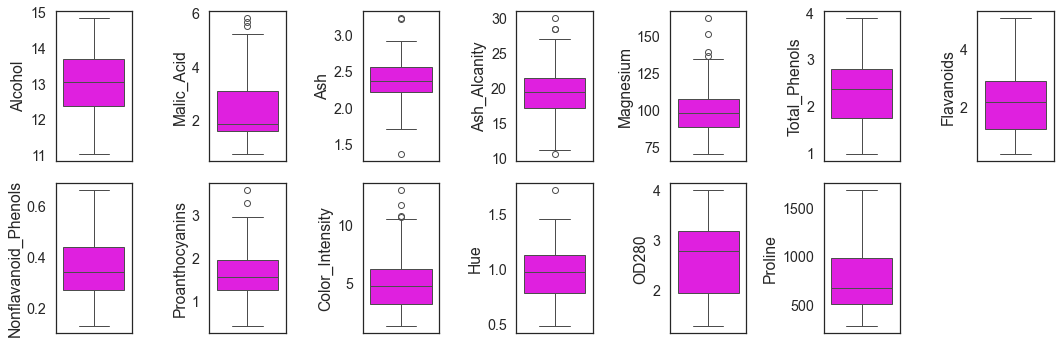

In [55]:
features = df.columns.to_list()
plt.figure(figsize=(15,5))
for i in range(0, len(features)):
    plt.subplot(2, 7, i + 1)
    sns.boxplot(y = df[features[i]], color = 'magenta', orient = 'v')
    plt.tight_layout()

<a id="section6"></a>
# Data Preprocessing

In [59]:
scaler = StandardScaler()

In [64]:
df_scaled=df.copy()
df_scaled[df_scaled.columns]=scaler.fit_transform(df_scaled)

In [71]:
df_scaled.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.51861,-0.56225,0.23205,-1.16959,1.91391,0.80900,1.03482,-0.65956,1.22488,0.25172,0.36218,1.84792,1.01301
1,0.24629,-0.49941,-0.82800,-2.49085,0.01815,0.56865,0.73363,-0.82072,-0.54472,-0.29332,0.40605,1.11345,0.96524
2,0.19688,0.02123,1.10933,-0.26874,0.08836,0.80900,1.21553,-0.49841,2.13597,0.26902,0.31830,0.78859,1.39515
3,1.69155,-0.34681,0.48793,-0.80925,0.93092,2.49145,1.46652,-0.98188,1.03215,1.18607,-0.42754,1.18407,2.33457
4,0.29570,0.22769,1.84040,0.45195,1.28199,0.80900,0.66335,0.22680,0.40140,-0.31928,0.36218,0.44960,-0.03787


In [72]:
df_scaled.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.00000,178.00000,178.00000,178.00000,178.00000,178.00000,178.00000,178.00000,178.00000,178.00000,178.00000,178.00000,178.00000
mean,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000
std,1.00282,1.00282,1.00282,1.00282,1.00282,1.00282,1.00282,1.00282,1.00282,1.00282,1.00282,1.00282,1.00282
min,-2.43424,-1.43298,-3.67916,-2.67102,-2.08826,-2.10725,-1.69597,-1.86823,-2.06903,-1.63429,-2.09473,-1.89505,-1.49319
25%,-0.78824,-0.65875,-0.57212,-0.68914,-0.82442,-0.88547,-0.82754,-0.74014,-0.59728,-0.79510,-0.76756,-0.95225,-0.78464
50%,0.06100,-0.42311,-0.02382,0.00152,-0.12228,0.09596,0.10615,-0.17609,-0.06290,-0.15922,0.03313,0.23773,-0.23372
75%,0.83613,0.66979,0.69811,0.60209,0.50964,0.80900,0.84909,0.60954,0.62918,0.49396,0.71316,0.78859,0.75825
max,2.25977,3.10919,3.15633,3.15451,4.37137,2.53952,3.06283,2.40240,3.48507,3.43543,3.30169,1.96091,2.97147


## Applying PCA (Principal Component Analysis)

In [103]:
pca = PCA(n_components=2).fit(df_scaled)
df_pca = pca.transform(df_scaled)

<a id="section7"></a>
# Machine Learning

## K-Means

### Finding Best K Value - Elbow Method

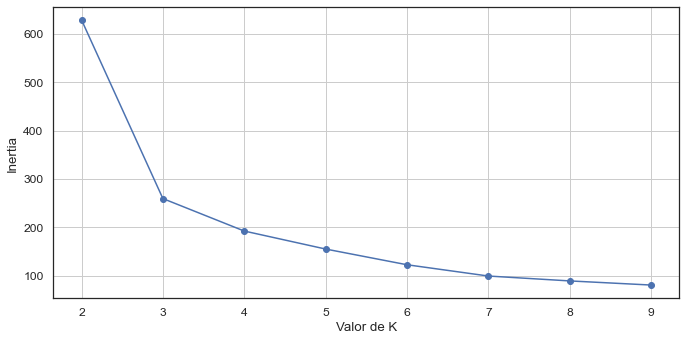

In [154]:
range_k = range(2, 10)

inertia_pca = []

for k in range_k:
    
    modelo_pca = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=42)
    modelo_pca.fit(df_pca)
    inertia_pca.append(modelo_pca.inertia_)

plt.figure(figsize=(10,5))    
plt.plot(range_k, inertia_pca, 'o-')
plt.xlabel("Valor de K")
plt.ylabel("Inertia")
plt.grid()
plt.show()

In [106]:
kl = KneeLocator(range(2, 10), inertia_pca, curve="convex", direction="decreasing")

kl.elbow

3

### Finding Best K Value - Silhouette Score Method

In [124]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=42)
    kmeans.fit(df_pca)
    score = silhouette_score(df_pca, kmeans.labels_)
    silhouette_coefficients.append(score)

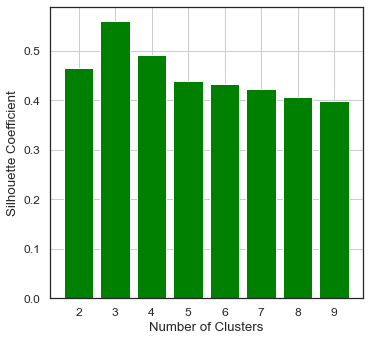

In [162]:
plt.figure(figsize=(5,5))
plt.bar(range(2, 10), silhouette_coefficients, color='green')
plt.xticks(range(2, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.grid(True)

### Visualizing Both Methods Results

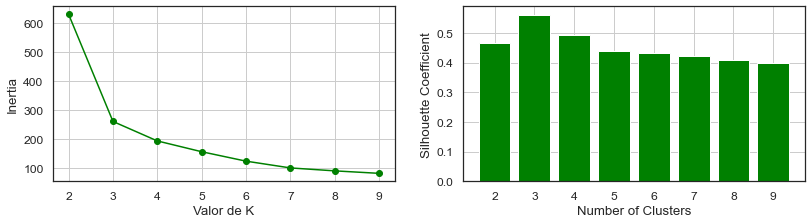

In [153]:
sns.set(style='white',font_scale=1.1, rc={'figure.figsize':(12,3)})

plt.subplot(1, 2, 1)
   
plt.plot(range_k, inertia_pca, 'o-', color='green')
plt.xlabel("Valor de K")
plt.ylabel("Inertia")
plt.grid(True)

plt.subplot(1, 2, 2)

plt.bar(range(2, 10), silhouette_coefficients, color='green')
plt.xticks(range(2, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.grid(True)


plt.show()

- **From the techniques used above, it's clear K=3 is the best number of clusters for this case**

### Applying Best K Value

In [191]:
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=300, random_state=10)
label = kmeans.fit_predict(df_scaled)

centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

In [193]:
label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [194]:
pd.Series(kmeans_labels).value_counts()

2    65
1    62
0    51
Name: count, dtype: int64

### Adding Label Column to Original Dataframe

In [197]:
df['Cluster_Label'] = list(label)

In [198]:
df.head(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster_Label
0,14.23000,1.71000,2.43000,15.60000,127,2.80000,3.06000,0.28000,2.29000,5.64000,1.04000,3.92000,1065,1
1,13.20000,1.78000,2.14000,11.20000,100,2.65000,2.76000,0.26000,1.28000,4.38000,1.05000,3.40000,1050,1
2,13.16000,2.36000,2.67000,18.60000,101,2.80000,3.24000,0.30000,2.81000,5.68000,1.03000,3.17000,1185,1
3,14.37000,1.95000,2.50000,16.80000,113,3.85000,3.49000,0.24000,2.18000,7.80000,0.86000,3.45000,1480,1
4,13.24000,2.59000,2.87000,21.00000,118,2.80000,2.69000,0.39000,1.82000,4.32000,1.04000,2.93000,735,1


### Visualizing Clustering

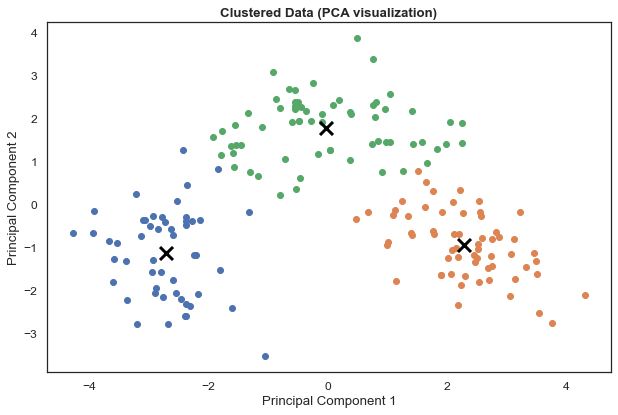

In [182]:
u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(df_pca[label == i , 0] , df_pca[label == i , 1] , label = i, cmap='autumn')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            marker='x', s=169,
            color='black', zorder=10,lw=3)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustered Data (PCA visualization)',fontweight='bold')
plt.show()

## DBSCAN

In [261]:
# Primeira versão do modelo
dbscan_v1 = DBSCAN(eps = 0.5)

In [262]:
# Fit
dbscan_v1.fit(df_pca)

DBSCAN()

In [263]:
# Labels
dbscan_v1.labels_

array([ 0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  2,  1,  1, -1, -1,  2,  0, -1,  2,
       -1,  0,  1,  0, -1,  0,  0,  2,  2,  1,  0, -1, -1,  0,  2,  3,  0,
        2,  2,  2,  1,  2,  1,  1,  1,  2,  2,  0, -1,  2,  0,  2,  2,  2,
       -1,  2,  2,  1,  2,  1,  2,  0,  0,  2,  1,  2,  2, -1,  2,  2, -1,
        2,  0,  0,  1, -1,  0,  2, -1,  1,  2,  1, -1,  3,  3,  3,  3,  3,
       -1,  3,  3,  3,  3,  3,  3,  3, -1,  3, -1,  3,  4,  4,  4,  4, -1,
        4,  3, -1,  4,  3, -1, -1,  3, -1,  3,  3,  4,  3,  4,  4,  4,  4,
       -1,  3,  4, -1,  4,  4,  4, -1], dtype=int64)

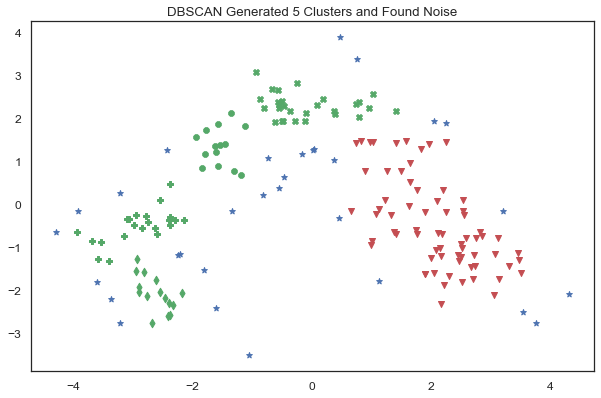

In [264]:
# Plot
for i in range(0, df_pca.shape[0]):
    if dbscan_v1.labels_[i] == 0:
        c1 = plt.scatter(df_pca[i,0], df_pca[i,1], c = 'r', marker = 'v')
    elif dbscan_v1.labels_[i] == 1:
        c2 = plt.scatter(df_pca[i,0], df_pca[i,1], c = 'g', marker = '8')
    elif dbscan_v1.labels_[i] == 2:
        c3 = plt.scatter(df_pca[i,0], df_pca[i,1], c = 'g', marker = 'X')
    elif dbscan_v1.labels_[i] == 3:
        c4 = plt.scatter(df_pca[i,0], df_pca[i,1], c = 'g', marker = 'P')
    elif dbscan_v1.labels_[i] == 4:
        c5 = plt.scatter(df_pca[i,0], df_pca[i,1], c = 'g', marker = 'd')
    elif dbscan_v1.labels_[i] == -1:
        c6 = plt.scatter(df_pca[i,0], df_pca[i,1], c = 'b', marker = '*')


plt.title('DBSCAN Generated 5 Clusters and Found Noise')
plt.show()

## Mean-Shift

In [248]:
modelo_v2 = MeanShift()

In [249]:
# Fit
modelo_v2.fit(df_pca)

MeanShift()

In [250]:
labels = modelo_v2.labels_
cluster_centers = modelo_v2.cluster_centers_
n_clusters_ = len(np.unique(labels))

In [251]:
# Print
print(cluster_centers)
print("Número Estimado de Clusters:", n_clusters_)

[[ 0.10304065  1.50245111]
 [ 2.12525299 -0.61076181]
 [-2.76001283 -1.12551563]]
Número Estimado de Clusters: 3


In [252]:
colors = 10*['r.','g.','b.','c.','k.','y.','m.']

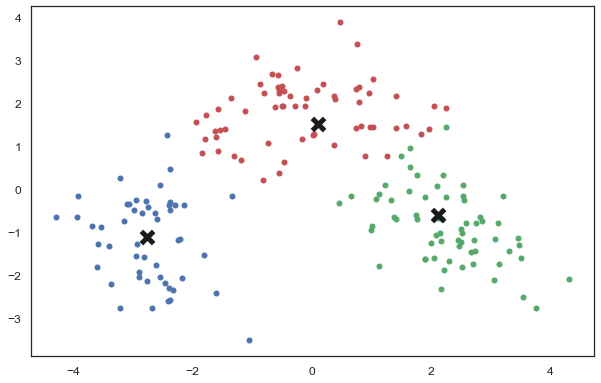

In [253]:
# Plot
for i in range(len(df_pca)):
    plt.plot(df_pca[i][0], df_pca[i][1], colors[labels[i]], markersize = 10)

plt.scatter(cluster_centers[:,0], cluster_centers[:,1], marker = "x", color = 'k', s = 150, linewidths = 5, zorder = 10)
plt.show()